# DS 636 851 - Data Analytics R Programming Midterm Project 
- **Niharika Singh**
- **Deepthi Sachidanand**
- **Guneet Kohli**
- **Elian Morales Pina**

In [9]:
library(reshape2)
library(dplyr)
library(ggplot2)

#  to see the full number instead of scientific notations:
options(scipen=999)
# options(scipen=0) # to revert to the default behavior

In [10]:
 universe = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', "NFLX", "ORCL", "SAP", "TSLA")

# Function to select the columns Close and Adj.Close and it renames those columns to data source
selectColumn = function(data) {
    filename = paste0("data/", data, ".csv")
    df = read.csv(file=filename)
    df = select(df, Date, Close, Adj.Close)
    df = rename(df, !!paste("Close", data, sep='_') := Close, !!paste("Adj_Close", data, sep='_') := Adj.Close)
    return(df)
}

# Read and store the dataframes in a list
stock_data_list = lapply(universe, selectColumn)

# join data based on the Date:
# note: Reduce() is a function that successively takes two inputs of a list 
# Reduce() is like doing the following: f(f(f(1, 2), 3), 4) and the list is c(1,2,3,4)
df = Reduce(function(df1, df2) { left_join(df1, df2, by="Date") }, stock_data_list)

head(df)

,Date,Close_IBM,Adj_Close_IBM,Close_MSFT,Adj_Close_MSFT,Close_GOOG,Adj_Close_GOOG,Close_AAPL,Adj_Close_AAPL,Close_AMZN,⋯,Close_META,Adj_Close_META,Close_NFLX,Adj_Close_NFLX,Close_ORCL,Adj_Close_ORCL,Close_SAP,Adj_Close_SAP,Close_TSLA,Adj_Close_TSLA
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,111.8001,85.95,80.39184,53.2500,53.2500,43.0650,40.77653,59.4505,⋯,181.42,181.42,201.07,201.07,46.63,42.28244,112.39,101.2103,21.36867,21.36867
2,2018-01-03,151.5201,114.8733,86.35,80.76598,54.1240,54.1240,43.0575,40.76942,60.2100,⋯,184.67,184.67,205.05,205.05,47.71,43.26175,113.31,102.0388,21.15000,21.15000
3,2018-01-04,154.5889,117.1999,87.11,81.47684,54.3200,54.3200,43.2575,40.95880,60.4795,⋯,184.33,184.33,205.63,205.63,48.18,43.68792,115.05,103.6057,20.97467,20.97467
4,2018-01-05,155.3442,117.7725,88.19,82.48699,55.1115,55.1115,43.7500,41.42513,61.4570,⋯,186.85,186.85,209.99,209.99,48.47,43.95089,116.33,104.7584,21.10533,21.10533
5,2018-01-08,156.2811,118.4828,88.28,82.57117,55.3470,55.3470,43.5875,41.27126,62.3435,⋯,188.28,188.28,212.05,212.05,48.98,44.41334,114.80,103.3806,22.42733,22.42733
6,2018-01-09,156.6252,118.7437,88.22,82.51505,55.3130,55.3130,43.5825,41.26652,62.6350,⋯,187.87,187.87,209.31,209.31,49.06,44.65912,114.16,102.8042,22.24600,22.24600


In [11]:
# making sure that the datasets are ordered by date
sortByDate = function(df) {
    df$Date = as.Date(df$Date, format="%Y-%m-%d")
    return(df[order(df$Date), ])
}

df = sortByDate(df)
head(df)

,Date,Close_IBM,Adj_Close_IBM,Close_MSFT,Adj_Close_MSFT,Close_GOOG,Adj_Close_GOOG,Close_AAPL,Adj_Close_AAPL,Close_AMZN,⋯,Close_META,Adj_Close_META,Close_NFLX,Adj_Close_NFLX,Close_ORCL,Adj_Close_ORCL,Close_SAP,Adj_Close_SAP,Close_TSLA,Adj_Close_TSLA
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,111.8001,85.95,80.39184,53.2500,53.2500,43.0650,40.77653,59.4505,⋯,181.42,181.42,201.07,201.07,46.63,42.28244,112.39,101.2103,21.36867,21.36867
2,2018-01-03,151.5201,114.8733,86.35,80.76598,54.1240,54.1240,43.0575,40.76942,60.2100,⋯,184.67,184.67,205.05,205.05,47.71,43.26175,113.31,102.0388,21.15000,21.15000
3,2018-01-04,154.5889,117.1999,87.11,81.47684,54.3200,54.3200,43.2575,40.95880,60.4795,⋯,184.33,184.33,205.63,205.63,48.18,43.68792,115.05,103.6057,20.97467,20.97467
4,2018-01-05,155.3442,117.7725,88.19,82.48699,55.1115,55.1115,43.7500,41.42513,61.4570,⋯,186.85,186.85,209.99,209.99,48.47,43.95089,116.33,104.7584,21.10533,21.10533
5,2018-01-08,156.2811,118.4828,88.28,82.57117,55.3470,55.3470,43.5875,41.27126,62.3435,⋯,188.28,188.28,212.05,212.05,48.98,44.41334,114.80,103.3806,22.42733,22.42733
6,2018-01-09,156.6252,118.7437,88.22,82.51505,55.3130,55.3130,43.5825,41.26652,62.6350,⋯,187.87,187.87,209.31,209.31,49.06,44.65912,114.16,102.8042,22.24600,22.24600


## Question 1

In [12]:
# the following are my Magic variables for testing purpose. Feel free to change
# this variables to try different settings on different stocks or dates.
INITIAL = 5000000
STOCKS = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN')
DATE = "2018-01-02"

# Get the data for the selected stocks on the purchase date
purchase_data = df[df$Date == DATE, ]; purchase_data

,Date,Close_IBM,Adj_Close_IBM,Close_MSFT,Adj_Close_MSFT,Close_GOOG,Adj_Close_GOOG,Close_AAPL,Adj_Close_AAPL,Close_AMZN,⋯,Close_META,Adj_Close_META,Close_NFLX,Adj_Close_NFLX,Close_ORCL,Adj_Close_ORCL,Close_SAP,Adj_Close_SAP,Close_TSLA,Adj_Close_TSLA
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,111.8001,85.95,80.39184,53.25,53.25,43.065,40.77653,59.4505,⋯,181.42,181.42,201.07,201.07,46.63,42.28244,112.39,101.2103,21.36867,21.36867


In [13]:
portfolioMTM = function(stocks = STOCKS,
                       initial = INITIAL,
                       date = DATE) 
{
    # Get the data for the selected stocks on the purchase date
    purchase_data = df[df$Date == date, ]
    
    invest_per_stock = initial / 5
    
    portfolio = data.frame(
        Stock = character(0),
        Shares = numeric(0),
        Cash_Left = numeric(0),
        Value = numeric(0)
    )
    
    for (brand in stocks) {
        close_price = purchase_data[[paste("Close", brand, sep="_")]]
        shares_bought = floor(invest_per_stock / close_price)
        cash_left = invest_per_stock - (shares_bought * close_price)

        portfolio = rbind(
        portfolio,
        data.frame(
              Stock = brand,
              Shares = shares_bought,
              Cash_Left = cash_left,
              Value = shares_bought * close_price
            )
        )
    }

    MTM = sum(portfolio$Cash_Left) + sum(portfolio$Value)
    # note: I should add the following info to the next two lines to the dataset. Will do this later if I have time
    cat("MTM:", MTM, "\tDate -", as.character(date) ,"\n")
    print(portfolio); cat("\n")
    return(portfolio)
}

portfolioMTM()

MTM: 5000000 	Date - 2018-01-02 
  Stock Shares Cash_Left    Value
1   IBM   6781  29.41260 999970.6
2  MSFT  11634  57.73490 999942.3
3  GOOG  18779  18.25000 999981.8
4  AAPL  23220  30.72322 999969.3
5  AMZN  16820  42.59000 999957.4



Stock,Shares,Cash_Left,Value
<chr>,<dbl>,<dbl>,<dbl>
IBM,6781,29.41260,999970.6
MSFT,11634,57.73490,999942.3
GOOG,18779,18.25000,999981.8
AAPL,23220,30.72322,999969.3
AMZN,16820,42.59000,999957.4


## Question 2

### Function

In [16]:
# the following are my Magic variables for testing purpose. Feel free to change
# this variables to try different settings on different stocks or dates.
INITIAL = 5000000
STOCKS = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN')
DATE = "2018-01-02"

# Get the data for the selected stocks on the purchase date
purchase_data = df[df$Date == DATE, ]; purchase_data

,Date,Close_IBM,Adj_Close_IBM,Close_MSFT,Adj_Close_MSFT,Close_GOOG,Adj_Close_GOOG,Close_AAPL,Adj_Close_AAPL,Close_AMZN,⋯,Close_META,Adj_Close_META,Close_NFLX,Adj_Close_NFLX,Close_ORCL,Adj_Close_ORCL,Close_SAP,Adj_Close_SAP,Close_TSLA,Adj_Close_TSLA
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,111.8001,85.95,80.39184,53.25,53.25,43.065,40.77653,59.4505,⋯,181.42,181.42,201.07,201.07,46.63,42.28244,112.39,101.2103,21.36867,21.36867


In [17]:
# Define the function
next_5_days = function(input_date) {
  input_date = as.Date(input_date, format="%Y-%m-%d")
  return(seq(from = input_date, by = "days", length.out = 8))
}

# Test the function
next_5_days("2018-01-02")

[1] "2018-01-02" "2018-01-03" "2018-01-04" "2018-01-05" "2018-01-06"
[6] "2018-01-07" "2018-01-08" "2018-01-09"

In [18]:
purchase_data

,Date,Close_IBM,Adj_Close_IBM,Close_MSFT,Adj_Close_MSFT,Close_GOOG,Adj_Close_GOOG,Close_AAPL,Adj_Close_AAPL,Close_AMZN,⋯,Close_META,Adj_Close_META,Close_NFLX,Adj_Close_NFLX,Close_ORCL,Adj_Close_ORCL,Close_SAP,Adj_Close_SAP,Close_TSLA,Adj_Close_TSLA
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,111.8001,85.95,80.39184,53.25,53.25,43.065,40.77653,59.4505,⋯,181.42,181.42,201.07,201.07,46.63,42.28244,112.39,101.2103,21.36867,21.36867


In [19]:
# Note: add more parameters for the creation of the day1Portfolio = portfolioMTM(DATE=date)
rebalancingMTM = function(date=DATE) 
{
    # Enter a date to return the dates of 5 days later of the entered date
    DATE_5 = next_5_days(date) 
    purchase_data = df[df$Date %in% DATE_5, ]
    
    # column names of adj close of every stock
    adj_close_colname = grep("Adj_Close", names(df), value=TRUE)
    
    start = purchase_data[1,] # data from the initial date 
    end = purchase_data[nrow(purchase_data), ] # date from 5 business days later from the initial date
    
    # the differences between the adj close of the initial date and the adj close of the 5th business day
    changes_adj_close = (start[, adj_close_colname] - end[, adj_close_colname]) / start[, adj_close_colname] * 100
    
    # storing the column names of the stocks with the lowest change in adj close
    low_stock = c()
    for (i in 1:5) 
    {
        # returning the column name of the lowest change in adj close
        colNames = names(which.min(changes_adj_close))
        low_stock = c(low_stock, colNames) # storing the column names 

        # erase the column with the lowest change in adj close to have a new min in the next iteration
        changes_adj_close[,colNames] = NULL

    }
    
    # storing the stocks MTM from the initial date 
    day1Portfolio = portfolioMTM(date=date) # Note: maybe I should create variables for the rebalancing()
    
    # keeping only the Close_STOCK columns
    purchase_data_Close = purchase_data[, !colnames(purchase_data) %in% adj_close_colname][nrow(purchase_data),]
    
    new_INITIAL = 0
    
    # Selling the stock from our first profolio from day one based on the Close price of the stock on the 5th day
    for (stock in day1Portfolio$Stock) {
        cat(paste("Close", stock, sep='_'), '\n')

        stock_Shares = day1Portfolio[day1Portfolio$Stock == stock, "Shares"]
        cat("stock_Shares", stock_Shares, "\n")

        sell_CLose = purchase_data_Close[, paste("Close", stock, sep='_')]
        cat("sell_CLose", sell_CLose, "\n")

        profit_cash = stock_Shares * sell_CLose
        cat("profit_cash", profit_cash, "\n\n")

        new_INITIAL = new_INITIAL + profit_cash

    }
    
    modified_vec = gsub("Adj_Close_", "", low_stock)
    
    # new INITIAL for our new porfolio of the 5th day
    new_INITIAL = sum(day1Portfolio$Cash_Left) + new_INITIAL; new_INITIAL
    return(portfolioMTM(stocks=modified_vec, date=end$Date, initial=new_INITIAL))

}

rebalancingMTM()

MTM: 5000000 	Date - 2018-01-02 
  Stock Shares Cash_Left    Value
1   IBM   6781  29.41260 999970.6
2  MSFT  11634  57.73490 999942.3
3  GOOG  18779  18.25000 999981.8
4  AAPL  23220  30.72322 999969.3
5  AMZN  16820  42.59000 999957.4

Close_IBM 
stock_Shares 6781 
sell_CLose 156.6252 
profit_cash 1062076 

Close_MSFT 
stock_Shares 11634 
sell_CLose 88.22 
profit_cash 1026351 

Close_GOOG 
stock_Shares 18779 
sell_CLose 55.313 
profit_cash 1038723 

Close_AAPL 
stock_Shares 23220 
sell_CLose 43.5825 
profit_cash 1011986 

Close_AMZN 
stock_Shares 16820 
sell_CLose 62.635 
profit_cash 1053521 

MTM: 5192835 	Date - 2018-01-09 
  Stock Shares Cash_Left   Value
1   IBM   6630 141.65734 1038425
2  ORCL  21169  15.86389 1038551
3  AMZN  16581  16.12322 1038551
4  TSLA  46685  12.51506 1038555
5  NFLX   4961 180.12498 1038387



Stock,Shares,Cash_Left,Value
<chr>,<dbl>,<dbl>,<dbl>
IBM,6630,141.65734,1038425
ORCL,21169,15.86389,1038551
AMZN,16581,16.12322,1038551
TSLA,46685,12.51506,1038555
NFLX,4961,180.12498,1038387


### Question 3

In [20]:
PURCHASE_DATE = '2018-02-05'
SOLD_DATE = '2018-02-08'
SOLD_STOCK = 'IBM'

DIVIDEN_DATE = '2018-02-08'
DIVIDEN = 1.5

In [21]:
# update the values of stocks because the shares value changes every day 
updateValue = function(portfolioMTM_new, date)
{
    data = df[df$Date %in% date, ]
    
    for (brand in portfolioMTM_new$Stock) 
    {
        shares = portfolioMTM_new$Shares[portfolioMTM_new$Stock == brand]
        close_price = data[[paste("Close", brand, sep="_")]]
        portfolioMTM_new$Value[portfolioMTM_new$Stock == brand] = shares * close_price
    }
    
    return(portfolioMTM_new)
    
}

In [22]:
sellStock = function(sold_date = SOLD_DATE,
                    sold_stock = SOLD_STOCK,
                    purchase_date = PURCHASE_DATE,
                    dividen_date = DIVIDEN_DATE,
                    dividen = DIVIDEN) 
{
    if (purchase_date > sold_date) 
    {
        return("Error! purchase_date > sold_date")
    }
    
    sold_data = df[df$Date %in% sold_date, ]
    col_close = paste("Close_", sold_stock, sep="")
    stock_close = df[df$Date == sold_date, ][[col_close]]
    
    cat("Purchased Porfolio\n")
    portfolioMTM_old = portfolioMTM(date=purchase_date)
    portfolioMTM_new = portfolioMTM_old
    
    purchase_date = as.Date(purchase_date)
    sold_date = as.Date(sold_date)
    dividend_date = as.Date(dividen_date)
    
    if (purchase_date < dividen_date & dividen_date <= sold_date) 
    {
        portfolioMTM_new = updateValue(portfolioMTM_new, dividen_date)
        
        cash = portfolioMTM_new$Cash_Left[portfolioMTM_new$Stock == sold_stock]
        shares = portfolioMTM_new$Shares[portfolioMTM_new$Stock == sold_stock]
        portfolioMTM_new$Cash_Left[portfolioMTM_new$Stock == sold_stock] = cash + (dividen * shares)
        
        MTM = sum(portfolioMTM_new$Cash_Left) + sum(portfolioMTM_new$Value)
        cat("Added dividen amount:", (dividen * shares), "\n")
        cat("MTM:", MTM, "\tDate -", as.character(dividen_date) ,"\n")
        print(portfolioMTM_new); cat("\n")
        
    } else 
    {
        MTM = sum(portfolioMTM_new$Cash_Left) + sum(portfolioMTM_new$Value)
        cat("No dividen added", "\n")
        cat("MTM:", MTM, "\tDate -", as.character(purchase_date) ,"\n")
        print(portfolioMTM_new); cat("\n")
    }
    
    portfolioMTM_new = updateValue(portfolioMTM_new, sold_date)
    
    # Modify the specific cells in the copy
    cash = portfolioMTM_new$Cash_Left[portfolioMTM_new$Stock == sold_stock]
    shares = portfolioMTM_new$Shares[portfolioMTM_new$Stock == sold_stock]

    portfolioMTM_new$Cash_Left[portfolioMTM_new$Stock == sold_stock] = cash + (shares * stock_close)

    portfolioMTM_new$Shares[portfolioMTM_new$Stock == sold_stock] = 0
    portfolioMTM_new$Value[portfolioMTM_new$Stock == sold_stock] = 0
    
    cat("After selling the stock!\n")
    MTM = sum(portfolioMTM_new$Cash_Left) + sum(portfolioMTM_new$Value)
    cat("MTM:", MTM, "\tDate -", as.character(sold_date) ,"\n")
    print(portfolioMTM_new); cat("\n")

    return(portfolioMTM_new)
}

sellStock()

Purchased Porfolio
MTM: 5000000 	Date - 2018-02-05 
  Stock Shares Cash_Left    Value
1   IBM   6857  97.35288 999902.6
2  MSFT  11363  56.00000 999944.0
3  GOOG  18942  51.80106 999948.2
4  AAPL  25560  28.87444 999971.1
5  AMZN  14388  34.00000 999966.0

Added dividen amount: 10285.5 
MTM: 4855539 	Date - 2018-02-08 
  Stock Shares   Cash_Left    Value
1   IBM   6857 10382.85288 967518.8
2  MSFT  11363    56.00000 965968.7
3  GOOG  18942    51.80106 948539.6
4  AAPL  25560    28.87444 991408.4
5  AMZN  14388    34.00000 971549.7

After selling the stock!
MTM: 4855539 	Date - 2018-02-08 
  Stock Shares    Cash_Left    Value
1   IBM      0 977901.61696      0.0
2  MSFT  11363     56.00000 965968.7
3  GOOG  18942     51.80106 948539.6
4  AAPL  25560     28.87444 991408.4
5  AMZN  14388     34.00000 971549.7



Stock,Shares,Cash_Left,Value
<chr>,<dbl>,<dbl>,<dbl>
IBM,0,977901.61696,0.0
MSFT,11363,56.00000,965968.7
GOOG,18942,51.80106,948539.6
AAPL,25560,28.87444,991408.4
AMZN,14388,34.00000,971549.7


In [23]:
# Sceneario 1 
# buying shares before dividen date
# selling after dividen date

sellStock(purchase_date="2018-02-05",
         dividen_date="2018-02-08",
         sold_date="2018-02-12")

Purchased Porfolio
MTM: 5000000 	Date - 2018-02-05 
  Stock Shares Cash_Left    Value
1   IBM   6857  97.35288 999902.6
2  MSFT  11363  56.00000 999944.0
3  GOOG  18942  51.80106 999948.2
4  AAPL  25560  28.87444 999971.1
5  AMZN  14388  34.00000 999966.0

Added dividen amount: 10285.5 
MTM: 4855539 	Date - 2018-02-08 
  Stock Shares   Cash_Left    Value
1   IBM   6857 10382.85288 967518.8
2  MSFT  11363    56.00000 965968.7
3  GOOG  18942    51.80106 948539.6
4  AAPL  25560    28.87444 991408.4
5  AMZN  14388    34.00000 971549.7

After selling the stock!
MTM: 5049096 	Date - 2018-02-12 
  Stock Shares     Cash_Left     Value
1   IBM      0 1002877.83490       0.0
2  MSFT  11363      56.00000 1012784.2
3  GOOG  18942      51.80106  996292.4
4  AAPL  25560      28.87444 1039717.0
5  AMZN  14388      34.00000  997253.9



Stock,Shares,Cash_Left,Value
<chr>,<dbl>,<dbl>,<dbl>
IBM,0,1002877.83490,0.0
MSFT,11363,56.00000,1012784.2
GOOG,18942,51.80106,996292.4
AAPL,25560,28.87444,1039717.0
AMZN,14388,34.00000,997253.9


In [24]:
# Sceneario 2
# buying shares before dividen date
# selling on dividen date

sellStock(purchase_date="2018-02-05",
         dividen_date="2018-02-08",
         sold_date="2018-02-08")

Purchased Porfolio
MTM: 5000000 	Date - 2018-02-05 
  Stock Shares Cash_Left    Value
1   IBM   6857  97.35288 999902.6
2  MSFT  11363  56.00000 999944.0
3  GOOG  18942  51.80106 999948.2
4  AAPL  25560  28.87444 999971.1
5  AMZN  14388  34.00000 999966.0

Added dividen amount: 10285.5 
MTM: 4855539 	Date - 2018-02-08 
  Stock Shares   Cash_Left    Value
1   IBM   6857 10382.85288 967518.8
2  MSFT  11363    56.00000 965968.7
3  GOOG  18942    51.80106 948539.6
4  AAPL  25560    28.87444 991408.4
5  AMZN  14388    34.00000 971549.7

After selling the stock!
MTM: 4855539 	Date - 2018-02-08 
  Stock Shares    Cash_Left    Value
1   IBM      0 977901.61696      0.0
2  MSFT  11363     56.00000 965968.7
3  GOOG  18942     51.80106 948539.6
4  AAPL  25560     28.87444 991408.4
5  AMZN  14388     34.00000 971549.7



Stock,Shares,Cash_Left,Value
<chr>,<dbl>,<dbl>,<dbl>
IBM,0,977901.61696,0.0
MSFT,11363,56.00000,965968.7
GOOG,18942,51.80106,948539.6
AAPL,25560,28.87444,991408.4
AMZN,14388,34.00000,971549.7


In [25]:
# Sceneario 3
# buying shares before dividen date
# selling before dividen date

sellStock(purchase_date="2018-02-05",
         dividen_date="2018-02-08",
         sold_date="2018-02-07")

Purchased Porfolio
MTM: 5000000 	Date - 2018-02-05 
  Stock Shares Cash_Left    Value
1   IBM   6857  97.35288 999902.6
2  MSFT  11363  56.00000 999944.0
3  GOOG  18942  51.80106 999948.2
4  AAPL  25560  28.87444 999971.1
5  AMZN  14388  34.00000 999966.0

No dividen added 
MTM: 5000000 	Date - 2018-02-05 
  Stock Shares Cash_Left    Value
1   IBM   6857  97.35288 999902.6
2  MSFT  11363  56.00000 999944.0
3  GOOG  18942  51.80106 999948.2
4  AAPL  25560  28.87444 999971.1
5  AMZN  14388  34.00000 999966.0

After selling the stock!
MTM: 5058865 	Date - 2018-02-07 
  Stock Shares     Cash_Left     Value
1   IBM      0 1008653.28029       0.0
2  MSFT  11363      56.00000 1018238.4
3  GOOG  18942      51.80106  993110.1
4  AAPL  25560      28.87444 1019460.5
5  AMZN  14388      34.00000 1019231.5



Stock,Shares,Cash_Left,Value
<chr>,<dbl>,<dbl>,<dbl>
IBM,0,1008653.28029,0.0
MSFT,11363,56.00000,1018238.4
GOOG,18942,51.80106,993110.1
AAPL,25560,28.87444,1019460.5
AMZN,14388,34.00000,1019231.5


In [26]:
# Sceneario 4
# buying shares in dividen date
# selling after dividen date

sellStock(purchase_date="2018-02-08",
         dividen_date="2018-02-08",
         sold_date="2018-02-12")

Purchased Porfolio
MTM: 5000000 	Date - 2018-02-08 
  Stock Shares Cash_Left    Value
1   IBM   7087  28.36794 999971.6
2  MSFT  11763  27.34647 999972.7
3  GOOG  19969  32.35600 999967.6
4  AAPL  25781  19.51406 999980.5
5  AMZN  14809  22.24538 999977.8

No dividen added 
MTM: 5000000 	Date - 2018-02-08 
  Stock Shares Cash_Left    Value
1   IBM   7087  28.36794 999971.6
2  MSFT  11763  27.34647 999972.7
3  GOOG  19969  32.35600 999967.6
4  AAPL  25781  19.51406 999980.5
5  AMZN  14809  22.24538 999977.8

After selling the stock!
MTM: 5199802 	Date - 2018-02-12 
  Stock Shares     Cash_Left   Value
1   IBM      0 1025813.97937       0
2  MSFT  11763      27.34647 1048436
3  GOOG  19969      32.35600 1050309
4  AAPL  25781      19.51406 1048707
5  AMZN  14809      22.24538 1026434



Stock,Shares,Cash_Left,Value
<chr>,<dbl>,<dbl>,<dbl>
IBM,0,1025813.97937,0
MSFT,11763,27.34647,1048436
GOOG,19969,32.35600,1050309
AAPL,25781,19.51406,1048707
AMZN,14809,22.24538,1026434


In [27]:
# Sceneario 5
# buying shares after dividen date
# selling after dividen date

sellStock(purchase_date="2018-02-09",
         dividen_date="2018-02-08",
         sold_date="2018-02-12")

Purchased Porfolio
MTM: 5000000 	Date - 2018-02-09 
  Stock Shares Cash_Left    Value
1   IBM   6996  26.75399 999973.2
2  MSFT  11340  38.80000 999961.2
3  GOOG  19271  47.08100 999952.9
4  AAPL  25573  31.74193 999968.3
5  AMZN  14929  55.53521 999944.5

No dividen added 
MTM: 5000000 	Date - 2018-02-09 
  Stock Shares Cash_Left    Value
1   IBM   6996  26.75399 999973.2
2  MSFT  11340  38.80000 999961.2
3  GOOG  19271  47.08100 999952.9
4  AAPL  25573  31.74193 999968.3
5  AMZN  14929  55.53521 999944.5

After selling the stock!
MTM: 5112142 	Date - 2018-02-12 
  Stock Shares     Cash_Left   Value
1   IBM      0 1012640.85552       0
2  MSFT  11340      38.80000 1010734
3  GOOG  19271      47.08100 1013597
4  AAPL  25573      31.74193 1040246
5  AMZN  14929      55.53521 1034751



Stock,Shares,Cash_Left,Value
<chr>,<dbl>,<dbl>,<dbl>
IBM,0,1012640.85552,0
MSFT,11340,38.80000,1010734
GOOG,19271,47.08100,1013597
AAPL,25573,31.74193,1040246
AMZN,14929,55.53521,1034751


### Question 4

In [28]:

# old version of th formula that generates 5 business dates
next_5_days = function(input_date) {
  input_date = as.Date(input_date, format="%Y-%m-%d")
  return(seq(from = input_date, by = "days", length.out = 8))
}

next_5_days("2018-12-28")

[1] "2018-12-28" "2018-12-29" "2018-12-30" "2018-12-31" "2019-01-01"
[6] "2019-01-02" "2019-01-03" "2019-01-04"

In [29]:
# Generates the dates of the next 5 buisness dates
next_5_days = function(input_date) {
    input_date = as.Date(input_date, format="%Y-%m-%d")

    # Start with the initial 5 days
    dates = seq(from = input_date, by = "days", length.out = 6)

    # last date:
    last_date = tail(df$Date, n=1)

    # While the intersection of the dates and the dataframe's Date column 
    # has less than 5 dates, this new version keeps adding days
    while(length(intersect(dates, df$Date)) <= 5) {
        dates = seq(from = input_date, by = "days", length.out = length(dates) + 1)
        if (dates[length(dates)] >= last_date) {return(dates)}
    }

    return(dates)
}

next_5_days("2018-12-15")

[1] "2018-12-15" "2018-12-16" "2018-12-17" "2018-12-18" "2018-12-19"
 [6] "2018-12-20" "2018-12-21" "2018-12-22" "2018-12-23" "2018-12-24"

In [30]:
# Note: add more parameters for the creation of the day1Portfolio = portfolioMTM(DATE=date)
# updated this formula so that it takes a previous portfolio as a parameter
rebalancingMTM_Q4 = function(date=DATE, day1Portfolio)
{
    # Enter a date to return the dates of 5 days later of the entered date
    DATE_5 = next_5_days(date)
    purchase_data = df[df$Date %in% DATE_5, ]

    # column names of adj close of every stock
    adj_close_colname = grep("Adj_Close", names(df), value=TRUE)

    start = purchase_data[1,] # data from the initial date
    end = purchase_data[nrow(purchase_data), ] # date from 5 business days later from the initial date

    # the differences between the adj close of the initial date and the adj close of the 5th business day
    changes_adj_close = (start[, adj_close_colname] - end[, adj_close_colname]) / start[, adj_close_colname] * 100

    # storing the column names of the stocks with the lowest change in adj close
    low_stock = c()
    for (i in 1:5)
    {
        # returning the column name of the lowest change in adj close
        colNames = names(which.min(changes_adj_close))
        low_stock = c(low_stock, colNames) # storing the column names

        # erase the column with the lowest change in adj close to have a new min in the next iteration
        changes_adj_close[,colNames] = NULL

    }

    # storing the stocks MTM from the initial date
    # day1Portfolio = portfolioMTM(date=date) # Note: maybe I should create variables for the rebalancing()

    # keeping only the Close_STOCK columns
    purchase_data_Close = purchase_data[, !colnames(purchase_data) %in% adj_close_colname][nrow(purchase_data),]

    new_INITIAL = 0

    # Selling the stock from our first profolio from day one based on the Close price of the stock on the 5th day
    for (stock in day1Portfolio$Stock) {
        cat(paste("Close", stock, sep='_'), '\n')

        stock_Shares = day1Portfolio[day1Portfolio$Stock == stock, "Shares"]
        cat("stock_Shares", stock_Shares, "\n")

        sell_CLose = purchase_data_Close[, paste("Close", stock, sep='_')]
        cat("sell_CLose", sell_CLose, "\n")

        profit_cash = stock_Shares * sell_CLose
        cat("profit_cash", profit_cash, "\n\n")

        new_INITIAL = new_INITIAL + profit_cash

    }

    modified_vec = gsub("Adj_Close_", "", low_stock)

    # new INITIAL for our new porfolio of the 5th day
    new_INITIAL = sum(day1Portfolio$Cash_Left) + new_INITIAL; new_INITIAL
    return(portfolioMTM(stocks=modified_vec, date=end$Date, initial=new_INITIAL))

}

In [31]:
current_portfolio = rebalancingMTM(date="2018-01-02")
rebalancingMTM_Q4(date="2018-01-09", day1Portfolio=current_portfolio)

MTM: 5000000 	Date - 2018-01-02 
  Stock Shares Cash_Left    Value
1   IBM   6781  29.41260 999970.6
2  MSFT  11634  57.73490 999942.3
3  GOOG  18779  18.25000 999981.8
4  AAPL  23220  30.72322 999969.3
5  AMZN  16820  42.59000 999957.4

Close_IBM 
stock_Shares 6781 
sell_CLose 156.6252 
profit_cash 1062076 

Close_MSFT 
stock_Shares 11634 
sell_CLose 88.22 
profit_cash 1026351 

Close_GOOG 
stock_Shares 18779 
sell_CLose 55.313 
profit_cash 1038723 

Close_AAPL 
stock_Shares 23220 
sell_CLose 43.5825 
profit_cash 1011986 

Close_AMZN 
stock_Shares 16820 
sell_CLose 62.635 
profit_cash 1053521 

MTM: 5192835 	Date - 2018-01-09 
  Stock Shares Cash_Left   Value
1   IBM   6630 141.65734 1038425
2  ORCL  21169  15.86389 1038551
3  AMZN  16581  16.12322 1038551
4  TSLA  46685  12.51506 1038555
5  NFLX   4961 180.12498 1038387

Close_IBM 
stock_Shares 6630 
sell_CLose 161.2333 
profit_cash 1068977 

Close_ORCL 
stock_Shares 21169 
sell_CLose 50.27 
profit_cash 1064166 

Close_AMZN 
stock_Sh

Stock,Shares,Cash_Left,Value
<chr>,<dbl>,<dbl>,<dbl>
TSLA,46375,21.72191,1073303
NFLX,4934,179.67553,1073145
AMZN,16576,28.67553,1073296
IBM,6656,155.99048,1073169
AAPL,23971,23.10259,1073302


### Question 5

In [164]:
INITIAL = 5000000
STOCKS = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN')
DATE = "2018-01-02"
IDX = 1 # this is "2018-01-02"
PORTFOLIO = data.frame(
        Stock = character(0),
        Shares = numeric(0),
        Cash_Left = numeric(0),
        Value = numeric(0)
    )

# Get the data for the selected stocks on the purchase date
purchase_data = df[df$Date == DATE, ]; purchase_data

,Date,Close_IBM,Adj_Close_IBM,Close_MSFT,Adj_Close_MSFT,Close_GOOG,Adj_Close_GOOG,Close_AAPL,Adj_Close_AAPL,Close_AMZN,⋯,Close_META,Adj_Close_META,Close_NFLX,Adj_Close_NFLX,Close_ORCL,Adj_Close_ORCL,Close_SAP,Adj_Close_SAP,Close_TSLA,Adj_Close_TSLA
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,111.8001,85.95,80.39184,53.25,53.25,43.065,40.77653,59.4505,⋯,181.42,181.42,201.07,201.07,46.63,42.28244,112.39,101.2103,21.36867,21.36867


In [99]:
portfolioMTM = function(stocks = STOCKS,
                       initial = INITIAL,
                       idx = IDX,
                       shares_bought = 0,
                       cash_left = 0,
                       Value = 0) 
{
    # Get the data for the selected stocks on the purchase date
    purchase_data = df[idx, ]
    
    invest_per_stock = initial / 5
    
    portfolio = data.frame(
        Stock = character(0),
        Shares = numeric(0),
        Cash_Left = numeric(0),
        Value = numeric(0)
    )
    
    if (shares_bought[1] == 0) 
    {


        for (brand in stocks) {
            close_price = purchase_data[[paste("Close", brand, sep="_")]]
            shares_bought = floor(invest_per_stock / close_price)
            cash_left = invest_per_stock - (shares_bought * close_price)

            portfolio = rbind(
            portfolio,
            data.frame(
                  Stock = brand,
                  Shares = shares_bought,
                  Cash_Left = cash_left,
                  Value = shares_bought * close_price
                )
            )
        }
        
    } else {
        for (i in 1:length(stocks)) {
            close_price = purchase_data[[paste("Close", stocks[i], sep="_")]]

            portfolio = rbind(
            portfolio,
            data.frame(
                  Stock = stocks[i],
                  Shares = shares_bought[i],
                  Cash_Left = cash_left[i],
                  Value = shares_bought[i] * close_price
                )
            )
        }
        
    }
    

    MTM = sum(portfolio$Cash_Left) + sum(portfolio$Value)
    return(c(MTM, portfolio, as.character(df[idx, ]$Date)))
}

tmp = portfolioMTM(); tmp

[[1]]
[1] 5000000

$Stock
[1] "IBM"  "MSFT" "GOOG" "AAPL" "AMZN"

$Shares
[1]  6781 11634 18779 23220 16820

$Cash_Left
[1] 29.41260 57.73490 18.25000 30.72322 42.59000

$Value
[1] 999970.6 999942.3 999981.8 999969.3 999957.4

[[6]]
[1] "2018-01-02"

In [257]:
# Note: add more parameters for the creation of the day1Portfolio = portfolioMTM(DATE=date)
rebalancingMTM = function(indx=1, initial=5000000, low=TRUE) 
{
    purchase_data = df[indx:(indx+5), ]
    
    # column names of adj close of every stock
    adj_close_colname = grep("Adj_Close", names(df), value=TRUE)
    
    start = purchase_data[1,] # data from the initial date 
    end = purchase_data[nrow(purchase_data), ] # date from 5 business days later from the initial date
    
    # the differences between the adj close of the initial date and the adj close of the 5th business day
    changes_adj_close = (end[, adj_close_colname] - start[, adj_close_colname]) / start[, adj_close_colname] * 100
    
    # storing the column names of the stocks with the lowest change in adj close
    low_stock = c()
    for (i in 1:5) 
    {
        # returning the column name of the lowest change in adj close
        if (low) {
            colNames = names(which.min(changes_adj_close))
        } else {colNames = names(which.max(changes_adj_close))}
        
        low_stock = c(low_stock, colNames) # storing the column names 

        # erase the column with the lowest change in adj close to have a new min in the next iteration
        changes_adj_close[,colNames] = NULL

    }
    
    # storing the stocks MTM from the initial date 
    day1Portfolio = portfolioMTM(idx=indx, initial=initial) # Note: maybe I should create variables for the rebalancing()
    
    # keeping only the Close_STOCK columns
    purchase_data_Close = purchase_data[, !colnames(purchase_data) %in% adj_close_colname][nrow(purchase_data),]
    
    new_INITIAL = 0
    
    # Selling the stock from our first profolio from day one based on the Close price of the stock on the 5th day
    for (i in 1:length(day1Portfolio$Stock)) {

        stock_Shares = day1Portfolio$Shares[i]

        sell_CLose = purchase_data_Close[, paste("Close", day1Portfolio$Stock[i], sep='_')]

        profit_cash = stock_Shares * sell_CLose

        new_INITIAL = new_INITIAL + profit_cash

    }
    
    modified_vec = gsub("Adj_Close_", "", low_stock)
    
    # new INITIAL for our new porfolio of the 5th day
    new_INITIAL = sum(day1Portfolio$Cash_Left) + new_INITIAL; 
    return(c(new_INITIAL, modified_vec))

}

test_tmp = rebalancingMTM(); test_tmp

[1] "5192835.125283" "AAPL"           "SAP"            "MSFT"          
[5] "META"           "GOOG"

In [258]:
INITIAL = 5000000
STOCKS = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN')
DATE = "2018-01-02"
IDX = 1 # this is "2018-01-02"
SHARES_BOUGHT = 0
CASH_LEFT = 0
VALUE = 0 
PORTFOLIO = data.frame(
        Stock = character(0),
        Shares = numeric(0),
        Cash_Left = numeric(0),
        Value = numeric(0)
    )

In [259]:
MTMs <- c()
dates <- c()

for (indx in 1:nrow(df[df$Date <= as.Date("2018-12-31"), ]))
{
    tmp = portfolioMTM(idx = indx, initial=INITIAL, stocks=STOCKS, shares_bought = SHARES_BOUGHT, cash_left = CASH_LEFT, Value = VALUE)
      
    if (indx %in% seq_dates) 
    {
        tmp2 = rebalancingMTM(indx - 5, initial=MTMs[indx - 5])
        INITIAL = as.numeric(tmp2[1])
        STOCKS = tmp2[2:length(tmp2)]
        
        tmp = portfolioMTM(idx = indx, initial=INITIAL, stocks=STOCKS)
    } 
    
    MTMs = c(MTMs, as.numeric(tmp[[1]]))
    dates = c(dates, tmp[[6]])

    INITIAL = as.numeric(tmp[[1]])
    SHARES_BOUGHT = tmp$Shares
    CASH_LEFT = tmp$Cash_Left
    VALUE = tmp$Value
}

In [260]:
MTM_df <- data.frame(Date = as.Date(dates), MTM = MTMs)
head(MTM_df)

,Date,MTM
,<date>,<dbl>
1,2018-01-02,5000000
2,2018-01-03,5061154
3,2018-01-04,5103664
4,2018-01-05,5164091
5,2018-01-08,5187051
6,2018-01-09,5192835


In [261]:
tail(MTM_df)

,Date,MTM
,<date>,<dbl>
246,2018-12-21,5000344
247,2018-12-24,4816020
248,2018-12-26,5234091
249,2018-12-27,5199883
250,2018-12-28,5259292
251,2018-12-31,5313457


### Question 6

In [264]:
INITIAL = 5000000
STOCKS = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN')
DATE = "2018-01-02"
IDX = 1 # this is "2018-01-02"
SHARES_BOUGHT = 0
CASH_LEFT = 0
VALUE = 0 
PORTFOLIO = data.frame(
        Stock = character(0),
        Shares = numeric(0),
        Cash_Left = numeric(0),
        Value = numeric(0)
    )

In [265]:
MTMs_high <- c()

for (indx in 1:nrow(df[df$Date <= as.Date("2018-12-31"), ]))
{
    tmp = portfolioMTM(idx = indx, initial=INITIAL, stocks=STOCKS, shares_bought = SHARES_BOUGHT, cash_left = CASH_LEFT, Value = VALUE)
      
    if (indx %in% seq_dates) 
    {
        tmp2 = rebalancingMTM(indx - 5, initial=MTMs[indx - 5], low=FALSE)
        INITIAL = as.numeric(tmp2[1])
        STOCKS = tmp2[2:length(tmp2)]
        
        tmp = portfolioMTM(idx = indx, initial=INITIAL, stocks=STOCKS)
    } 
    
    MTMs_high = c(MTMs_high, as.numeric(tmp[[1]]))

    INITIAL = as.numeric(tmp[[1]])
    SHARES_BOUGHT = tmp$Shares
    CASH_LEFT = tmp$Cash_Left
    VALUE = tmp$Value
}

In [266]:
MTM_df$MTM_high = MTMs_high
head(MTM_df)

,Date,MTM,MTM_high
,<date>,<dbl>,<dbl>
1,2018-01-02,5000000,5000000
2,2018-01-03,5061154,5061154
3,2018-01-04,5103664,5103664
4,2018-01-05,5164091,5164091
5,2018-01-08,5187051,5187051
6,2018-01-09,5192835,5192835


In [267]:
tail(MTM_df)

,Date,MTM,MTM_high
,<date>,<dbl>,<dbl>
246,2018-12-21,5000344,4937622
247,2018-12-24,4816020,4821953
248,2018-12-26,5234091,5061707
249,2018-12-27,5199883,5108462
250,2018-12-28,5259292,5085780
251,2018-12-31,5313457,5177807


**Note**: The MTM strategy 1 on 2018-12-31 is higher then the MTM from strategy 2

In [268]:
equal_values = MTM_df$MTM == MTM_df$MTM_high
sum(equal_values) 

[1] 5

In [272]:
length(which(MTM_df$MTM != MTM_df$MTM_high))

[1] 246

**Note**: There is a clear differnece between strategy 1 and strategy 2

In [273]:
length(which(MTM_df$MTM > MTM_df$MTM_high))

[1] 124

**Note**: Strategy 1 vs Strategy 2 - overall there are higher MTM values when peforming strategy 1

In [277]:
length(which(MTM_df$MTM < MTM_df$MTM_high))

[1] 122

In [269]:
# Get the indices of non-equal values
non_equal_indices = which(MTM_df$MTM != MTM_df$MTM_high)
head(MTM_df[non_equal_indices, ])

,Date,MTM,MTM_high
,<date>,<dbl>,<dbl>
6,2018-01-09,5192835,5192835
7,2018-01-10,5172560,5210281
8,2018-01-11,5154481,5265332
9,2018-01-12,5156894,5308522
10,2018-01-16,5135934,5327874
11,2018-01-17,5184209,5366623


### Question 7

In [278]:
head(df)

,Date,Close_IBM,Adj_Close_IBM,Close_MSFT,Adj_Close_MSFT,Close_GOOG,Adj_Close_GOOG,Close_AAPL,Adj_Close_AAPL,Close_AMZN,⋯,Close_META,Adj_Close_META,Close_NFLX,Adj_Close_NFLX,Close_ORCL,Adj_Close_ORCL,Close_SAP,Adj_Close_SAP,Close_TSLA,Adj_Close_TSLA
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,111.8001,85.95,80.39184,53.2500,53.2500,43.0650,40.77653,59.4505,⋯,181.42,181.42,201.07,201.07,46.63,42.28244,112.39,101.2103,21.36867,21.36867
2,2018-01-03,151.5201,114.8733,86.35,80.76598,54.1240,54.1240,43.0575,40.76942,60.2100,⋯,184.67,184.67,205.05,205.05,47.71,43.26175,113.31,102.0388,21.15000,21.15000
3,2018-01-04,154.5889,117.1999,87.11,81.47684,54.3200,54.3200,43.2575,40.95880,60.4795,⋯,184.33,184.33,205.63,205.63,48.18,43.68792,115.05,103.6057,20.97467,20.97467
4,2018-01-05,155.3442,117.7725,88.19,82.48699,55.1115,55.1115,43.7500,41.42513,61.4570,⋯,186.85,186.85,209.99,209.99,48.47,43.95089,116.33,104.7584,21.10533,21.10533
5,2018-01-08,156.2811,118.4828,88.28,82.57117,55.3470,55.3470,43.5875,41.27126,62.3435,⋯,188.28,188.28,212.05,212.05,48.98,44.41334,114.80,103.3806,22.42733,22.42733
6,2018-01-09,156.6252,118.7437,88.22,82.51505,55.3130,55.3130,43.5825,41.26652,62.6350,⋯,187.87,187.87,209.31,209.31,49.06,44.65912,114.16,102.8042,22.24600,22.24600


In [279]:
close_columns = df[, -grep("Adj_", names(df))]
close_columns = subset(close_columns, Date <= as.Date("2018-12-31"))
head(close_columns)

,Date,Close_IBM,Close_MSFT,Close_GOOG,Close_AAPL,Close_AMZN,Close_META,Close_NFLX,Close_ORCL,Close_SAP,Close_TSLA
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.95,53.2500,43.0650,59.4505,181.42,201.07,46.63,112.39,21.36867
2,2018-01-03,151.5201,86.35,54.1240,43.0575,60.2100,184.67,205.05,47.71,113.31,21.15000
3,2018-01-04,154.5889,87.11,54.3200,43.2575,60.4795,184.33,205.63,48.18,115.05,20.97467
4,2018-01-05,155.3442,88.19,55.1115,43.7500,61.4570,186.85,209.99,48.47,116.33,21.10533
5,2018-01-08,156.2811,88.28,55.3470,43.5875,62.3435,188.28,212.05,48.98,114.80,22.42733
6,2018-01-09,156.6252,88.22,55.3130,43.5825,62.6350,187.87,209.31,49.06,114.16,22.24600


In [280]:
close_columns$high_tech_index = rowMeans(close_columns[-1])
head(close_columns)

,Date,Close_IBM,Close_MSFT,Close_GOOG,Close_AAPL,Close_AMZN,Close_META,Close_NFLX,Close_ORCL,Close_SAP,Close_TSLA,high_tech_index
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.95,53.2500,43.0650,59.4505,181.42,201.07,46.63,112.39,21.36867,95.20607
2,2018-01-03,151.5201,86.35,54.1240,43.0575,60.2100,184.67,205.05,47.71,113.31,21.15000,96.71516
3,2018-01-04,154.5889,87.11,54.3200,43.2575,60.4795,184.33,205.63,48.18,115.05,20.97467,97.39206
4,2018-01-05,155.3442,88.19,55.1115,43.7500,61.4570,186.85,209.99,48.47,116.33,21.10533,98.65980
5,2018-01-08,156.2811,88.28,55.3470,43.5875,62.3435,188.28,212.05,48.98,114.80,22.42733,99.23764
6,2018-01-09,156.6252,88.22,55.3130,43.5825,62.6350,187.87,209.31,49.06,114.16,22.24600,98.90217


In [281]:
# Calculate percentage change with respect to Jan 02, 2018 for high tech index
high_tech_index_pct_change = ((close_columns$high_tech_index - close_columns$high_tech_index[1]) / close_columns$high_tech_index[1]) * 100

close_columns$high_tech_index_pct_change = high_tech_index_pct_change

In [66]:
head(close_columns)

,Date,Close_IBM,Close_MSFT,Close_GOOG,Close_AAPL,Close_AMZN,Close_META,Close_NFLX,Close_ORCL,Close_SAP,Close_TSLA,high_tech_index,high_tech_index_pct_change
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.95,53.2500,43.0650,59.4505,181.42,201.07,46.63,112.39,21.36867,95.20607,0.000000
2,2018-01-03,151.5201,86.35,54.1240,43.0575,60.2100,184.67,205.05,47.71,113.31,21.15000,96.71516,1.585074
3,2018-01-04,154.5889,87.11,54.3200,43.2575,60.4795,184.33,205.63,48.18,115.05,20.97467,97.39206,2.296060
4,2018-01-05,155.3442,88.19,55.1115,43.7500,61.4570,186.85,209.99,48.47,116.33,21.10533,98.65980,3.627637
5,2018-01-08,156.2811,88.28,55.3470,43.5875,62.3435,188.28,212.05,48.98,114.80,22.42733,99.23764,4.234572
6,2018-01-09,156.6252,88.22,55.3130,43.5825,62.6350,187.87,209.31,49.06,114.16,22.24600,98.90217,3.882214


In [282]:
MTM_pct_change = ((MTM_df$MTM - MTM_df$MTM[1]) / MTM_df$MTM[1]) * 100

MTM_df$MTM_pct_change = MTM_pct_change
head(MTM_df)

,Date,MTM,MTM_high,MTM_pct_change
,<date>,<dbl>,<dbl>,<dbl>
1,2018-01-02,5000000,5000000,0.000000
2,2018-01-03,5061154,5061154,1.223084
3,2018-01-04,5103664,5103664,2.073270
4,2018-01-05,5164091,5164091,3.281811
5,2018-01-08,5187051,5187051,3.741018
6,2018-01-09,5192835,5192835,3.856703


In [283]:
# creates a dataframe with three columns: Date, MTM (Percentage Change of MTM) and high_tech_index (percentage change of high_tech_index)
Q7=data.frame(Date=MTM_df$Date, MTM=MTM_df$MTM_pct_change, high_tech_index=close_columns$high_tech_index_pct_change)

# this is like combining together all the columns except "Date"
# we ended up with a Date Column, a variable column (elements are either MTM or high_tech_index) and a Value containing the adj.close of 
# either MTM or high_tech_index
Q7_long = reshape2::melt(Q7, id.vars = "Date"); Q7_long

Date,variable,value
<date>,<fct>,<dbl>
2018-01-02,MTM,0.0000000
2018-01-03,MTM,1.2230836
2018-01-04,MTM,2.0732700
2018-01-05,MTM,3.2818114
2018-01-08,MTM,3.7410176
2018-01-09,MTM,3.8567025
2018-01-10,MTM,3.4512080
2018-01-11,MTM,3.0896103
2018-01-12,MTM,3.1378849


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


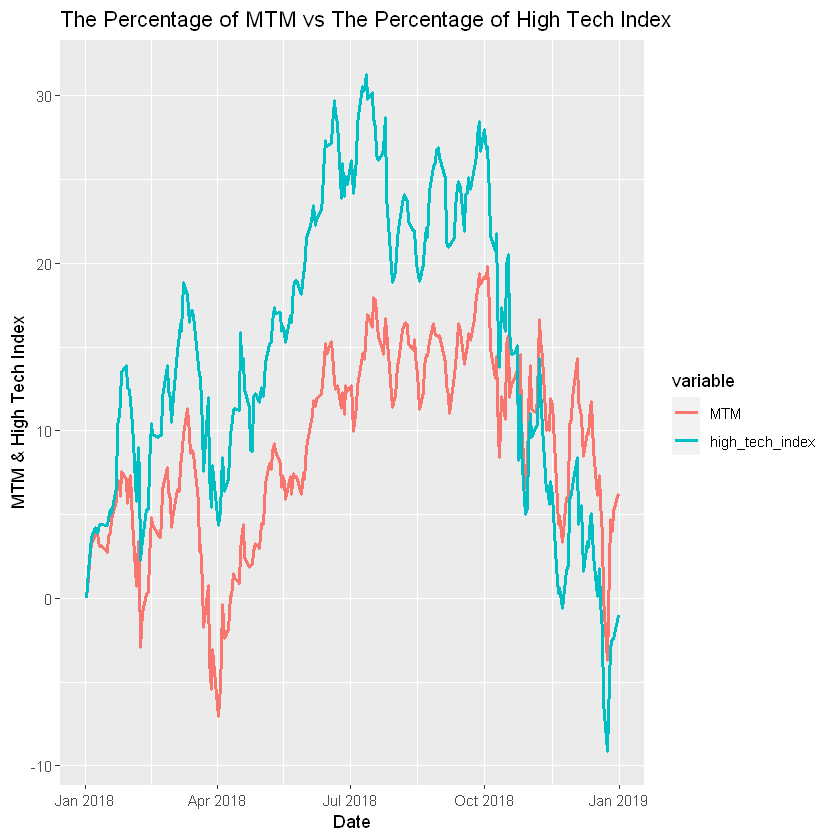

In [284]:
ggplot(Q7_long, aes(x=Date, y=value, group=variable, color=variable)) + 
    geom_line(size=1) +
    xlab("Date") + # x label
    ylab("MTM & High Tech Index") + # y label
    ggtitle("The Percentage of MTM vs The Percentage of High Tech Index") # chart title

### Question 8

In [285]:
JPY_df = selectColumn("JPY_X")
JPY_df = subset(JPY_df, Date <= as.Date("2018-12-31"))
head(JPY_df)

,Date,Close_JPY_X,Adj_Close_JPY_X
,<chr>,<dbl>,<dbl>
1,2018-01-02,112.770,112.770
2,2018-01-03,112.244,112.244
3,2018-01-04,112.607,112.607
4,2018-01-05,112.783,112.783
5,2018-01-08,113.154,113.154
6,2018-01-09,113.141,113.141


In [286]:
head(MTM_df)

,Date,MTM,MTM_high,MTM_pct_change
,<date>,<dbl>,<dbl>,<dbl>
1,2018-01-02,5000000,5000000,0.000000
2,2018-01-03,5061154,5061154,1.223084
3,2018-01-04,5103664,5103664,2.073270
4,2018-01-05,5164091,5164091,3.281811
5,2018-01-08,5187051,5187051,3.741018
6,2018-01-09,5192835,5192835,3.856703


In [287]:
head(close_columns)

,Date,Close_IBM,Close_MSFT,Close_GOOG,Close_AAPL,Close_AMZN,Close_META,Close_NFLX,Close_ORCL,Close_SAP,Close_TSLA,high_tech_index,high_tech_index_pct_change
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.95,53.2500,43.0650,59.4505,181.42,201.07,46.63,112.39,21.36867,95.20607,0.000000
2,2018-01-03,151.5201,86.35,54.1240,43.0575,60.2100,184.67,205.05,47.71,113.31,21.15000,96.71516,1.585074
3,2018-01-04,154.5889,87.11,54.3200,43.2575,60.4795,184.33,205.63,48.18,115.05,20.97467,97.39206,2.296060
4,2018-01-05,155.3442,88.19,55.1115,43.7500,61.4570,186.85,209.99,48.47,116.33,21.10533,98.65980,3.627637
5,2018-01-08,156.2811,88.28,55.3470,43.5875,62.3435,188.28,212.05,48.98,114.80,22.42733,99.23764,4.234572
6,2018-01-09,156.6252,88.22,55.3130,43.5825,62.6350,187.87,209.31,49.06,114.16,22.24600,98.90217,3.882214


In [288]:
# since JPY_df and MTM_df have different Dates and different number of rows
MTM_df = merge(JPY_df, MTM_df, by="Date")
head(MTM_df)

,Date,Close_JPY_X,Adj_Close_JPY_X,MTM,MTM_high,MTM_pct_change
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,112.770,112.770,5000000,5000000,0.000000
2,2018-01-03,112.244,112.244,5061154,5061154,1.223084
3,2018-01-04,112.607,112.607,5103664,5103664,2.073270
4,2018-01-05,112.783,112.783,5164091,5164091,3.281811
5,2018-01-08,113.154,113.154,5187051,5187051,3.741018
6,2018-01-09,113.141,113.141,5192835,5192835,3.856703


In [289]:
MTM_df$MTM_JPY = MTM_df$MTM * MTM_df$Close_JPY_X;
head(MTM_df)

,Date,Close_JPY_X,Adj_Close_JPY_X,MTM,MTM_high,MTM_pct_change,MTM_JPY
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,112.770,112.770,5000000,5000000,0.000000,563849985
2,2018-01-03,112.244,112.244,5061154,5061154,1.223084,568084205
3,2018-01-04,112.607,112.607,5103664,5103664,2.073270,574708246
4,2018-01-05,112.783,112.783,5164091,5164091,3.281811,582421611
5,2018-01-08,113.154,113.154,5187051,5187051,3.741018,586935550
6,2018-01-09,113.141,113.141,5192835,5192835,3.856703,587522554


In [290]:
MTM_JPY_pct_change = ((MTM_df$MTM_JPY - MTM_df$MTM_JPY[1]) / MTM_df$MTM_JPY[1]) * 100

MTM_df$MTM_JPY_pct_change = MTM_JPY_pct_change
head(MTM_df)

,Date,Close_JPY_X,Adj_Close_JPY_X,MTM,MTM_high,MTM_pct_change,MTM_JPY,MTM_JPY_pct_change
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,112.770,112.770,5000000,5000000,0.000000,563849985,0.000000
2,2018-01-03,112.244,112.244,5061154,5061154,1.223084,568084205,0.750948
3,2018-01-04,112.607,112.607,5103664,5103664,2.073270,574708246,1.925736
4,2018-01-05,112.783,112.783,5164091,5164091,3.281811,582421611,3.293718
5,2018-01-08,113.154,113.154,5187051,5187051,3.741018,586935550,4.094274
6,2018-01-09,113.141,113.141,5192835,5192835,3.856703,587522554,4.198381


In [291]:
# creates a dataframe with three columns: Date, MTM (Percentage Change of MTM) and high_tech_index (percentage change of high_tech_index)
Q8=data.frame(Date=MTM_df$Date, US_MTM=MTM_df$MTM_pct_change, JPY_MTM=MTM_df$MTM_JPY_pct_change)

# this is like combining together all the columns except "Date"
# we ended up with a Date Column, a variable column (elements are either MTM or high_tech_index) and a Value containing the adj.close of 
# either MTM or high_tech_index
Q8_long = reshape2::melt(Q8, id.vars = "Date"); Q8_long

Date,variable,value
<chr>,<fct>,<dbl>
2018-01-02,US_MTM,0.0000000
2018-01-03,US_MTM,1.2230836
2018-01-04,US_MTM,2.0732700
2018-01-05,US_MTM,3.2818114
2018-01-08,US_MTM,3.7410176
2018-01-09,US_MTM,3.8567025
2018-01-10,US_MTM,3.4512080
2018-01-11,US_MTM,3.0896103
2018-01-12,US_MTM,3.1378849


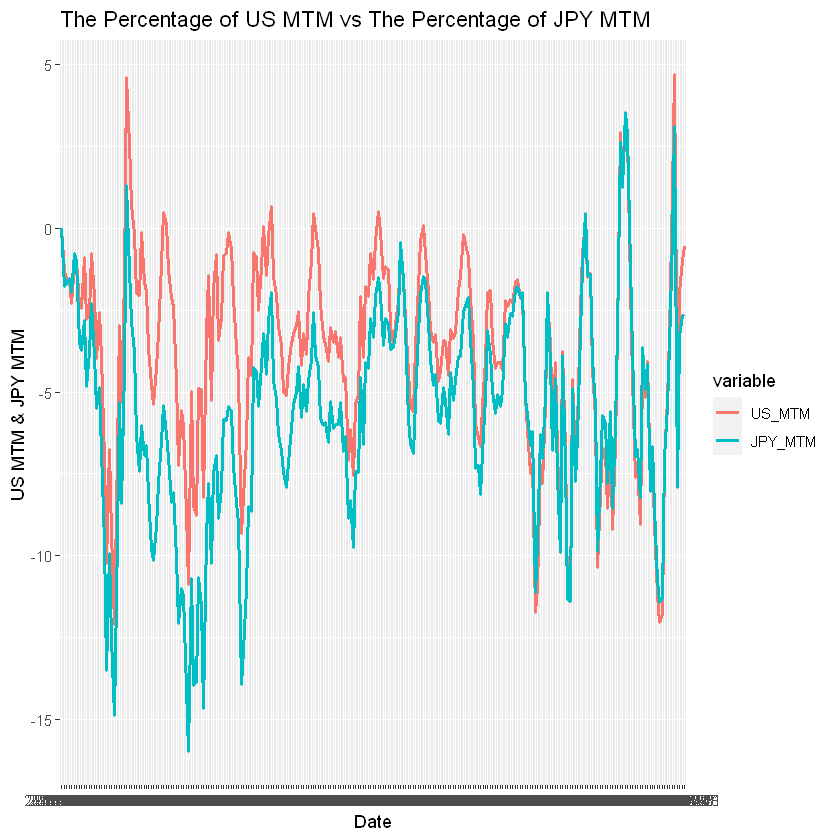

In [79]:
ggplot(Q8_long, aes(x=Date, y=value, group=variable, color=variable)) + 
    geom_line(size=1) +
    xlab("Date") + # x label
    ylab("US MTM & JPY MTM ") + # y label
    ggtitle("The Percentage of US MTM vs The Percentage of JPY MTM") # chart title

### Question 9

In [292]:
# Generates the dates of the next 5 buisness dates
next_5_days = function(input_date, num=5) {
    input_date = as.Date(input_date, format="%Y-%m-%d")

    # Start with the initial 5 days
    dates = seq(from = input_date, by = "days", length.out = 6)

    # last date:
    last_date = tail(df$Date, n=1)

    # While the intersection of the dates and the dataframe's Date column
    # has less than 5 dates, this new version keeps adding days
    while(length(intersect(dates, df$Date)) <= num) {
        dates = seq(from = input_date, by = "days", length.out = length(dates) + 1)
        if (dates[length(dates)] >= last_date) {return(dates)}
    }

    return(dates)
}

next_5_days("2018-12-28")

[1] "2018-12-28" "2018-12-29" "2018-12-30" "2018-12-31" "2019-01-01"
 [6] "2019-01-02" "2019-01-03" "2019-01-04" "2019-01-05" "2019-01-06"
[11] "2019-01-07"

In [293]:
portfolioMTM = function(stocks = STOCKS,
                       initial = INITIAL,
                       date = DATE) 
{
    # Get the data for the selected stocks on the purchase date
    purchase_data = df[df$Date == date, ]
    
    invest_per_stock = initial / 5
    
    portfolio = data.frame(
        Stock = character(0),
        Shares = numeric(0),
        Cash_Left = numeric(0),
        Value = numeric(0)
    )
    
    for (brand in stocks) {
        close_price = purchase_data[[paste("Close", brand, sep="_")]]
        shares_bought = floor(invest_per_stock / close_price)
        cash_left = invest_per_stock - (shares_bought * close_price)

        portfolio = rbind(
        portfolio,
        data.frame(
              Stock = brand,
              Shares = shares_bought,
              Cash_Left = cash_left,
              Value = shares_bought * close_price
            )
        )
    }

    MTM = sum(portfolio$Cash_Left) + sum(portfolio$Value)
    # note: I should add the following info to the next two lines to the dataset. Will do this later if I have time
    return(portfolio)
}

In [294]:
# Author: Elian Morales Pina

# Note: add more parameters for the creation of the day1Portfolio = portfolioMTM(DATE=date)
rebalancingMTM = function(date=DATE,
                         rebNum=5) 
{
    # Enter a date to return the dates of 5 days later of the entered date
    DATE_5 = next_5_days(date, rebNum) 
    purchase_data = df[df$Date %in% DATE_5, ]
    
    # column names of adj close of every stock
    adj_close_colname = grep("Adj_Close", names(df), value=TRUE)
    
    start = purchase_data[1,] # data from the initial date 
    end = purchase_data[nrow(purchase_data), ] # date from 5 business days later from the initial date
    
    # the differences between the adj close of the initial date and the adj close of the 5th business day
    changes_adj_close = (end[, adj_close_colname] - start[, adj_close_colname] ) / start[, adj_close_colname] * 100
    
    # storing the column names of the stocks with the lowest change in adj close
    low_stock = c()
    for (i in 1:5) 
    {
        # returning the column name of the lowest change in adj close
        colNames = names(which.min(changes_adj_close))
        low_stock = c(low_stock, colNames) # storing the column names 

        # erase the column with the lowest change in adj close to have a new min in the next iteration
        changes_adj_close[,colNames] = NULL

    }
    
    # storing the stocks MTM from the initial date 
    day1Portfolio = portfolioMTM(date=date) # Note: maybe I should create variables for the rebalancing()
    
    # keeping only the Close_STOCK columns
    purchase_data_Close = purchase_data[, !colnames(purchase_data) %in% adj_close_colname][nrow(purchase_data),]
    
    new_INITIAL = 0
    
    # Selling the stock from our first profolio from day one based on the Close price of the stock on the 5th day
    for (stock in day1Portfolio$Stock) {

        stock_Shares = day1Portfolio[day1Portfolio$Stock == stock, "Shares"]

        sell_CLose = purchase_data_Close[, paste("Close", stock, sep='_')]

        profit_cash = stock_Shares * sell_CLose

        new_INITIAL = new_INITIAL + profit_cash

    }
    
    modified_vec = gsub("Adj_Close_", "", low_stock)
    
    # new INITIAL for our new porfolio of the 5th day
    new_INITIAL = sum(day1Portfolio$Cash_Left) + new_INITIAL; new_INITIAL
    portfolio = portfolioMTM(stocks=modified_vec, date=end$Date, initial=new_INITIAL)
    
    MTM = sum(portfolio$Cash_Left) + sum(portfolio$Value)
    return(c(date,MTM))

}

rebalancingMTM("2018-12-31", 6)

[1] "2018-12-31"     "5602415.867384"

**Note**: I only have data for up to 6 buisness days after 2018-12-31 because the last date in my dataframe is 2019-01-09
- If I ever download more data, I will change my range from 1 to 6 to something like 1 to 20 depending on how much data I download. 

In [295]:
rebalancingMTM("2018-12-31", 3)

[1] "2018-12-31"     "5371169.383673"

In [296]:
# generate different MTM on 2018-12-31 with different intervals 
intervalMTM = data.frame(inter=numeric(0), Date=character(0), MTM=numeric(0))
for (i in 1:6) 
{
    tmp = rebalancingMTM("2018-12-31", i)
    intervalMTM = rbind(intervalMTM, data.frame(Interval = i, Date = tmp[1], MTM = tmp[2]))
}

intervalMTM

Interval,Date,MTM
<int>,<chr>,<chr>
1,2018-12-31,5371169.383673
2,2018-12-31,5371169.383673
3,2018-12-31,5371169.383673
4,2018-12-31,5473520.378551
5,2018-12-31,5573042.764396
6,2018-12-31,5602415.867384


In [297]:
# return the record with the max MTM 
intervalMTM[which.max(intervalMTM$MTM), ]

,Interval,Date,MTM
,<int>,<chr>,<chr>
6,6,2018-12-31,5602415.867384


**Conclusion**: Based on the above, the higher the interval (Number of business days), the higher it is the MTM
- Unfortunately, we ran out of data to further prove our hypothesis. 
- We need more data from 2019 and following years to be able to compute for higher intervals (Business days).